In [38]:
import pandas as pd
import seaborn as sns
import numpy as np

---------------

### Load Data

In [39]:
dataframes = {}
nodelists = {}
genres = ['Country', 'Electronic', 'Pop', 'Rock']

df = pd.DataFrame(columns=['from_roman', 'to_roman'])
nodes = pd.DataFrame(columns=['Id', 'sum_appearance'])

In [40]:
for genre in genres:
    dataframes[genre] = pd.read_csv('dataframes/df_' + genre.lower() + '.csv', index_col=0)
    nodelists[genre] = pd.read_csv('node_lists/nodes_' + genre.lower() + '.csv')

    df = pd.concat([df, dataframes[genre]])
    nodelists[genre] = nodelists[genre].drop(columns=['percent', 'average_appearance'])
    nodes = pd.concat([nodes, nodelists[genre]]).groupby(['Id']).sum().reset_index()

In [41]:
nodes['percent'] = nodes['sum_appearance'] / nodes['sum_appearance'].sum()

----------------------

### Log Ratio

In [42]:
def get_log(df, nodelist):

    return_df = df.copy()

    return_df = return_df.groupby(return_df.columns.tolist(),as_index=False).size()
    
    return_df['percent'] = return_df['size'] / return_df['size'].sum()
    
    log_ratio = []
    for i, row in return_df.iterrows():
        source_percent = nodelist.loc[nodelist['Id'] == row.from_roman, 'percent'].iloc[0]
        target_percent = nodelist.loc[nodelist['Id'] == row.to_roman, 'percent'].iloc[0]
        log_ratio.append(np.log(row.percent / (source_percent * target_percent)))

    return_df['log_ratio'] = log_ratio

    return return_df

------

# Main

In [67]:
log_df = get_log(df, nodes)

In [68]:
log_df.sort_values('percent', ascending=False).head(10)

,from_roman,to_roman,size,percent,log_ratio
1238,𝄪vii,𝄪vii,1,0.000026,6.982833
877,vii7,I,1,0.000026,-0.858889
1067,♯I7,♭VII7,1,0.000026,4.430787
332,V,III6,1,0.000026,-0.233101
327,V,I7,1,0.000026,-2.498645
1072,♯I7,♯i7,1,0.000026,4.872620
321,IVM9,I6,1,0.000026,3.226814
319,IVM7,♭VII,1,0.000026,-0.303093
317,IVM7,iv,1,0.000026,-0.444774
699,iii,iii7,1,0.000026,0.320694


In [60]:
log_df_filtered = log_df[log_df['size'] > 400]
color = ['#31394d' for _ in range(len(log_df_filtered))]

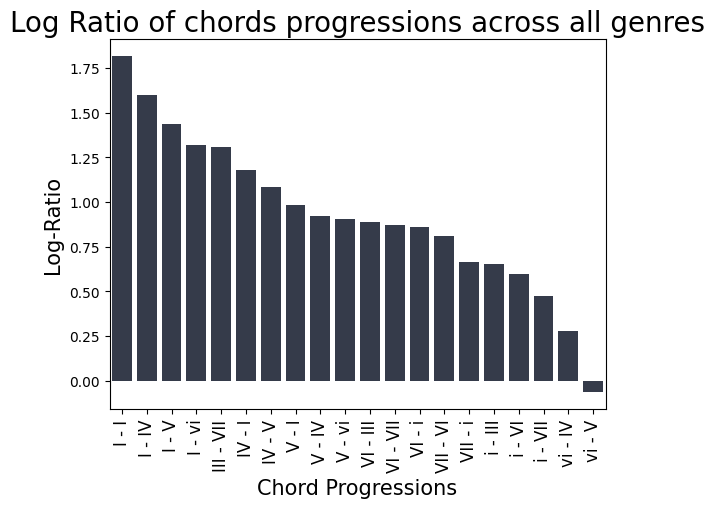

In [61]:
labels = log_df_filtered.from_roman + ' - ' + log_df_filtered.to_roman
log = log_df_filtered.log_ratio
df_plot = pd.DataFrame({'labels': labels, 'log': log}).sort_values('log', ascending=False)
ax = sns.barplot(x=df_plot.labels, y=df_plot.log, palette=color)
_ = ax.set_xticklabels(rotation=90, labels=labels, fontsize=12)
_ = ax.set_title('Log Ratio of chords progressions across all genres', fontsize=20)
_ = ax.set_xlabel('Chord Progressions', fontsize=15)
_ = ax.set_ylabel('Log-Ratio', fontsize=15)

### Save to node_list and edge_list

In [46]:
log_df = log_df.rename(columns={'from_roman': 'Source', 'to_roman': 'Target'})

In [47]:
log_df.to_csv('edge_lists/edges_all.csv', index=False)
nodes.to_csv('node_lists/nodes_all.csv', index=False)